In [ ]:
# %load_ext tensorboard

# %tensorflow_version 2.x      
# !pip install -U tensorflow-gpu
!pip show

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
categories=["cats", "dogs"]
for category in categories:
    path=os.path.join('/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/',category)
    for img in os.listdir(path):
        print(category)
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        print('img_array: ',img_array.shape,img_array.dtype)
        plt.imshow(img_array)
        plt.show()
        break

cats
img_array:  (373, 500) uint8


<Figure size 640x480 with 1 Axes>

dogs
img_array:  (311, 242) uint8


<Figure size 640x480 with 1 Axes>

In [ ]:
import tensorflow as tf
training_data=[]
def create_training_data():
    for category in categories:
        path=os.path.join('/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/',category)
        class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path,img))
            print(os.path.join(path,img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY )
            new_array= cv2.resize(img_array,(128,128))
            training_data.append([new_array,class_num])  
create_training_data()

/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/cat.541.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/11885.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/cat.2126.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/8169.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/cat.1382.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/cat.2893.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/11269.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/10794.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/11200.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/5333.jpg
/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/training_set/training_set/cats/1191.jpg
/home/akashchaurasia/Utkarsh/DataSe

In [ ]:
print(len(training_data))

32951


In [ ]:
from sklearn.model_selection import train_test_split
x=[]
y=[]
for features, label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,128,128,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.162,shuffle=True)
print('x_train:'+str(x_train.shape))
print('y_train:'+str(len(y_train)))
print('x_test:'+str(x_test.shape))
print('y_test:'+str(len(y_test)))

x_train:(27612, 128, 128, 1)
y_train:27612
x_test:(5339, 128, 128, 1)
y_test:5339


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=15,
                               horizontal_flip=True,
                               vertical_flip=True,
                               data_format='channels_last')
def create_aug_gen(in_gen):
    for in_x,in_y in in_gen:
        g_x = image_gen.flow(x_train,y_train,batch_size=55)
        x,y=next(g_x)
        yield x,y

In [ ]:
#Data Argumentation
import random
train_data = []
x_train_arg = []
y_train_arg = []
train_data.append([x_train,y_train])
cur_gen = create_aug_gen(iter(train_data))
t_x,t_y = next(cur_gen)
print('t_x',t_x.shape, t_x.dtype)
print('t_y',t_y.shape, t_y.dtype)
#for x in t_x:
#  plt.imshow(x.reshape(128,128))
#  plt.show()
x_train_arg = np.concatenate((x_train,t_x), axis=0)
y_train_arg = np.concatenate((y_train,t_y), axis=None)
print('x_train', x_train_arg.shape, x_train_arg.dtype)
print('y_train', y_train_arg.shape, y_train_arg.dtype)
#Shuffle data
random.shuffle([x_train_arg,y_train_arg])

t_x (55, 128, 128, 1) float32
t_y (55,) int64
x_train (27667, 128, 128, 1) float32
y_train (27667,) int64


cats


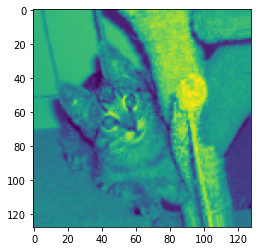

cats


cats


cats


cats


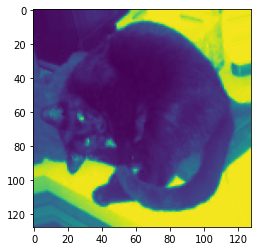

dogs


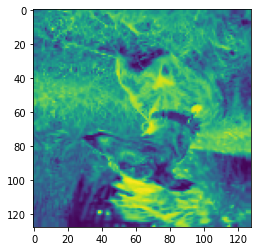

cats


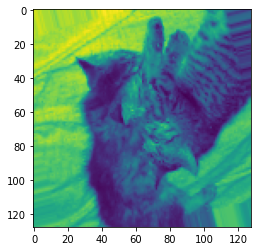

dogs


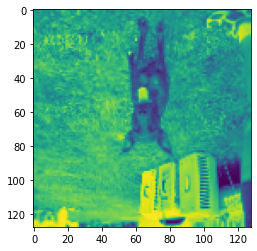

cats


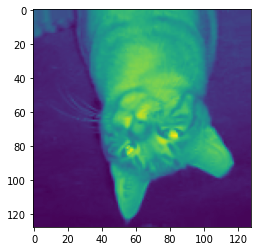

dogs


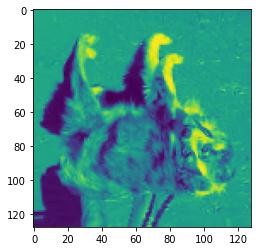

cats


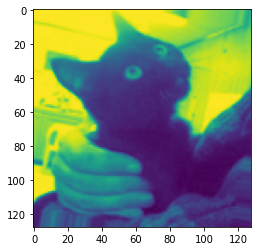

cats


dogs


dogs


cats


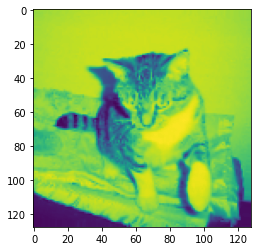

dogs


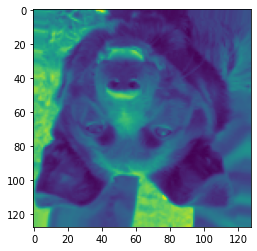

dogs


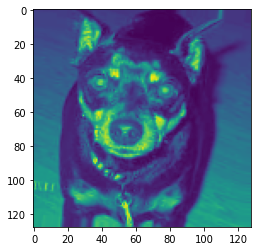

cats


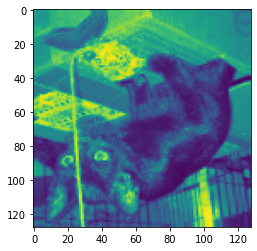

dogs


cats


dogs


cats


cats


cats


cats


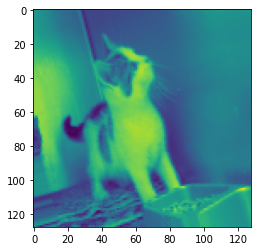

cats


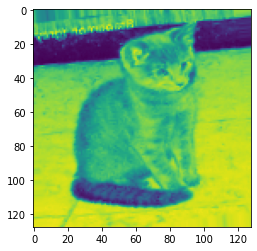

cats


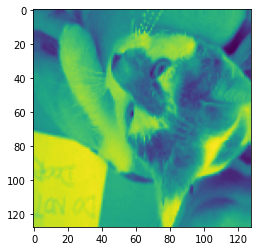

dogs


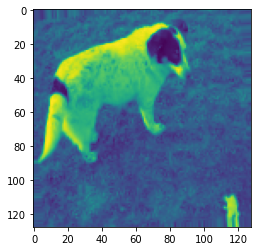

dogs


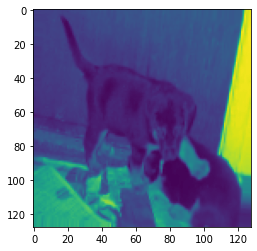

cats


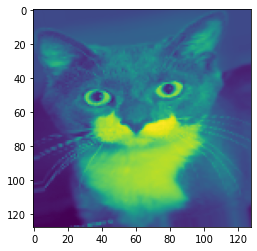

dogs


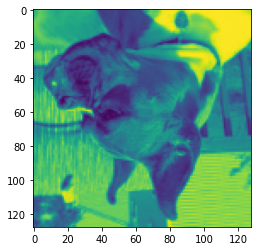

cats


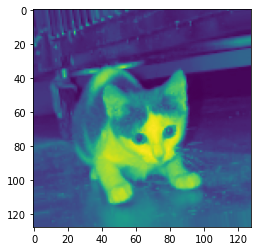

cats


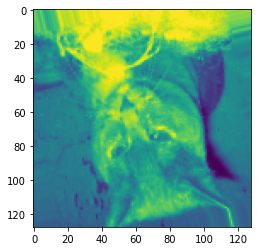

dogs


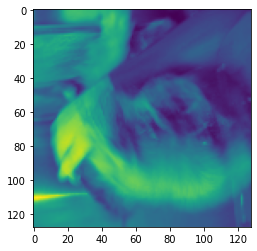

dogs


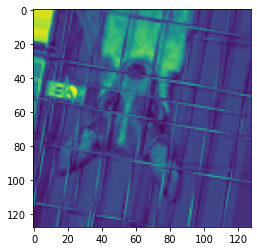

dogs


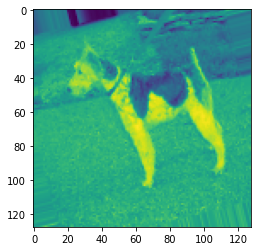

cats


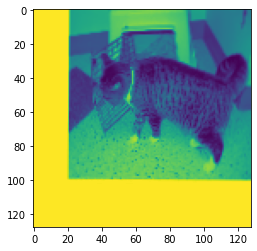

cats


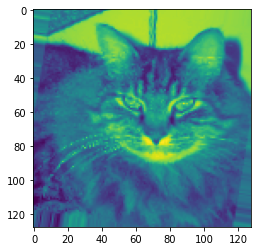

dogs


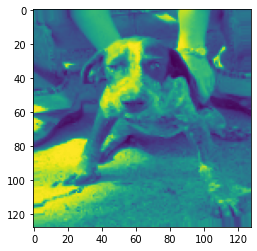

cats


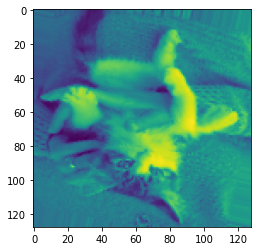

dogs


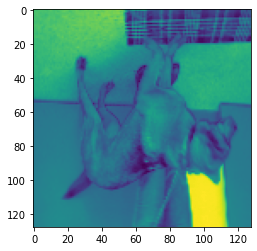

dogs


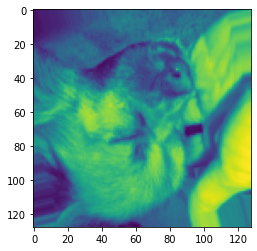

cats


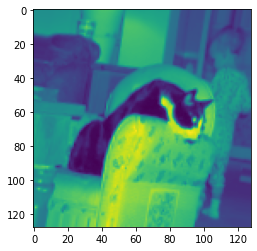

cats


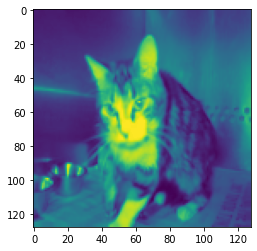

dogs


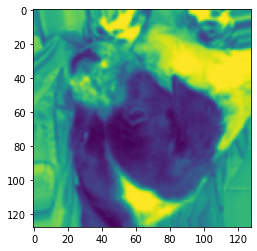

cats


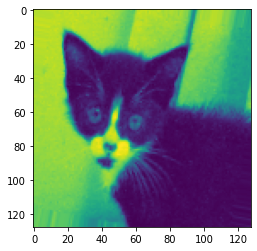

cats


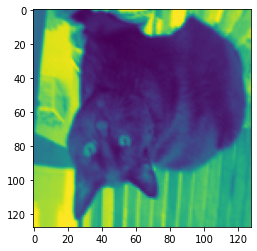

dogs


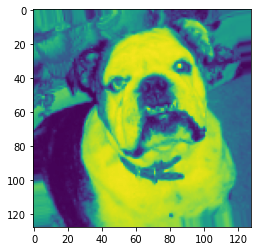

dogs


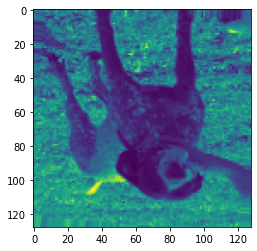

cats


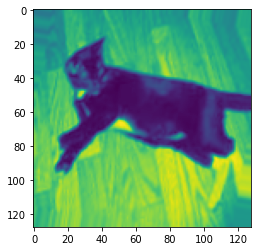

dogs


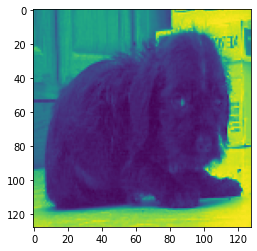

dogs


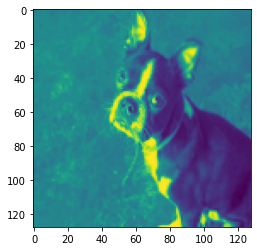

cats


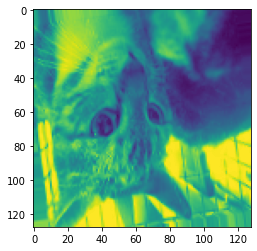

cats


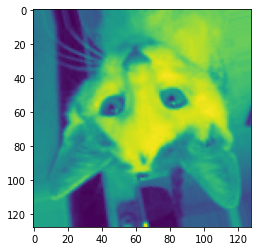

dogs


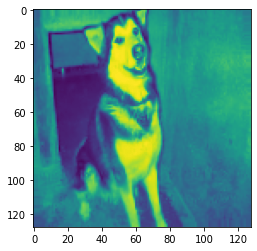

In [ ]:
#Images generated by the data argumentation
i = 0
for x in t_x:
    print(categories[t_y[i]])
    plt.imshow(x.reshape(128,128))
    plt.show()
    i = i+1

In [ ]:
%cd /home/akashchaurasia/Utkarsh/DataSet/CatVSDog

/home/akashchaurasia/Utkarsh/DataSet/CatVSDog


In [ ]:
import pickle
pickle_out=open("x.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense,SpatialDropout2D, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils
import datetime

#x_training=x_training/255.0

x = np.array(x_train).astype(np.float32)/255.0

#x = np.array(x_train).astype(np.float16)/255.0
y = np.array(y_train).astype(np.float16)

#y = np.array(y_train).astype(np.float32)
y_testing = np.array(y_test).astype(np.float16)


print('x_train:',x.shape,x.dtype)
print('y_train:',y.shape,y.dtype)
print('x_test:',x_test.shape,x.dtype)
#print('y_test:',y_test.shape,y.dtype)

def create_model(x,name):
    tf.keras.backend.clear_session()

    inputs = Input(x.shape[1:])

  #Layer 1
    layer = Conv2D(64,(3,3),activation='relu')(inputs)
    layer = MaxPooling2D(pool_size=(3,3))(layer)
    layer = Dropout(0.5)(layer)

      #Layer 2
    layer = Conv2D(64,(3,3),activation='relu')(layer)
    layer = MaxPooling2D(pool_size=(3,3))(layer)
    layer = Dropout(0.5)(layer)

      #Layer 3
    layer = Conv2D(64,(3,3),activation='relu')(layer)
    layer = MaxPooling2D(pool_size=(3,3))(layer)
    layer = Dropout(0.5)(layer)

      #Layer 4
    layer = Conv2D(64,(3,3),activation='relu')(layer)
      #layer = Activation('relu')(layer)

    layer = Flatten()(layer)
    layer = Dense(64)(layer)
      #layer = Activation('relu')(layer)

    output = Dense(1,activation='sigmoid')(layer)
    return Model(inputs=inputs,outputs=output,name=name)

#Testing with TPU device (it´s needed to create the network in this way)
def create_model_sequential(x,name):
    model = Sequential(name=name)
    model.add(Conv2D(64,(3,3),input_shape = x.shape[1:],activation="relu"))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.5))



    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(3,3)))  
    model.add(Dropout(0.5))


    model.add(Conv2D(512,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(3,3)))  
    model.add(Dropout(0.5))

  # added one more layer 
    model.add(Conv2D(128,(2,2),activation="relu"))




    model.add(Flatten())
    model.add(Dense(64))
      


    model.add(Dense(1))  
            
    model.add(Activation("sigmoid"))
    return model

time_saver = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
#Only for TPU
#with strategy.scope():
  #tf.compat.v1.disable_eager_execution() 
  #model = create_model(x,time_saver)
model = create_model_sequential(x,time_saver)
# op = Adam(learning_rate=0.0009)
op = Adam()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer= op, metrics=['accuracy',tf.keras.metrics.BinaryCrossentropy()])


#Model Summary
model.summary()

print(time_saver)        

x_train: (27612, 128, 128, 1) float32
y_train: (27612,) float16
x_test: (5339, 128, 128, 1) float32
Model: "03112022-122758"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 128)       0         
_________________

In [ ]:
#Callback to measure the time spending in each epoch
from tensorflow.keras.callbacks import Callback
import time
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
import time
import os
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint

#Time per each epoch
time_callback = TimeHistory()

#TensorBoard  
name_file= "/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/VidModel"+time_saver
filepath = '/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/Models/model/vidModel-'+time_saver+'.h5'
logdir = os.path.join("logs",name_file)

tensorboard = TensorBoard(log_dir=logdir, write_graph=True, write_images=True,
                         histogram_freq=0,update_freq='epoch',profile_batch=3)

#Only for TPU
tensorboard_tpu = TensorBoard(log_dir=logdir)
#Model Checkpoint (callbacks)
checkpoint = ModelCheckpoint(filepath,verbose=1,monitor='accuracy',save_best_only = True, mode='max')
callbacks_list = [tensorboard,checkpoint,time_callback]

start = time.time()

history=model.fit(x=x,y=y, batch_size=32,epochs=50,validation_split=0.145,shuffle=True,callbacks=callbacks_list,use_multiprocessing=True) 

end = time.time()

Epoch 1/50
 41/738 [>.............................] - ETA: 31:56 - loss: 0.7173 - accuracy: 0.5122 - binary_crossentropy: 0.7173

In [ ]:
%cd /home/akashchaurasia/Utkarsh/DataSet/CatVSDog

/home/akashchaurasia/Utkarsh/DataSet/CatVSDog


In [ ]:
model.save("modelVid3.h5")

In [ ]:
print("Time Training: {}".format(str(end-start)))

Time Training: 4239.581445455551


Time Training: 4239.581445455551
dict_keys(['loss', 'accuracy', 'binary_crossentropy', 'val_loss', 'val_accuracy', 'val_binary_crossentropy'])
Acc Max: 0.896774172782898
Loss Min: 0.250806987285614


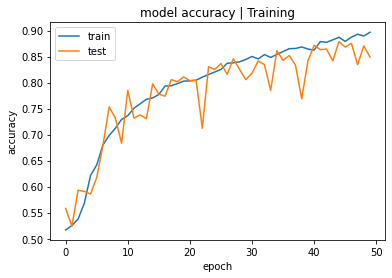

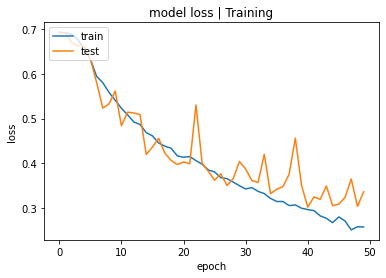

In [ ]:
print("Time Training: "+str(end-start))
# list all data in history to plot accuracy
print(history.history.keys())
print('Acc Max:',max(history.history['accuracy']))
print('Loss Min:',min(history.history['loss']))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy | Training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig("logs/testing/Escenario_1/"+time_saver+"_acc.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss | Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig("logs/testing/Escenario_1/"+time_saver+"_loss.png")
plt.show()

In [ ]:
import pickle
pickle_out=open("x_test.pickle","wb")
#pickle.dump(x,pickle_out)
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
#pickle.dump(y,pickle_out)
pickle.dump(y_test,pickle_out)
pickle_out.close()

x_test =pickle.load(open("x_test.pickle","rb"))
y_test =pickle.load(open("y_test.pickle","rb"))
print('x_test:', np.array(x_test).shape)
print('y_test:',np.array(y_test).shape)

x_test: (1297, 128, 128, 1)
y_test: (1297,)


In [ ]:
model = tf.keras.models.load_model('/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/modelVid3.h5')
y_test = np.array(y_test).astype(np.float64)
history_eval = model.evaluate(x=x_test,y=y_test,batch_size=32)
print(history_eval)

41/41 [==============================] - 5s 121ms/step - loss: 31.3232 - accuracy: 0.7417 - binary_crossentropy: 31.3232
[31.3232364654541, 0.7417116165161133, 31.3232364654541]


In [ ]:
import collections
y_prediction = []
x_images = np.array(x_test).astype(np.float32)/255.0
#x_test = x_test.reshape(-1,128,128,1)
for x_image in x_images:
    x_image = x_image.reshape(-1,128,128,1)
  #print(x_image.shape)
    prediction = model.predict(x_image)
    y_prediction.append(1 if prediction[0][0] >= 0.5 else 0)


y_prediction_array = np.array(y_prediction)
y_test_array = np.array(y_test)
print('y_predicted:',len(y_prediction),y_prediction_array)
print('y_true:',len(y_test),y_test_array)
print('Testing the whole dataset:',collections.Counter(y_prediction_array == y_test_array))

y_predicted: 1297 [1 1 1 ... 0 1 1]
y_true: 1297 [1. 1. 1. ... 0. 1. 1.]
Testing the whole dataset: Counter({True: 1084, False: 213})


In [ ]:
x_test_evaluate = np.array(x_test).astype(np.float32)/255.0
x_test_evaluate = x_test_evaluate.reshape(-1,128,128,1)
y_test_evaluate = np.array(y_test).astype(np.float32)
print('\n# Evaluate on test data')
results = model.evaluate(x_test_evaluate, y_test_evaluate, batch_size=32)
print('test loss, test acc,binary_crossentropy:', results)

print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test_evaluate[:3])
print('predictions shape:', predictions.shape)


# Evaluate on test data
41/41 [==============================] - 5s 111ms/step - loss: 0.3511 - accuracy: 0.8358 - binary_crossentropy: 0.3511
test loss, test acc,binary_crossentropy: [0.35114479064941406, 0.835774838924408, 0.35114479064941406]

# Generate predictions for 3 samples
predictions shape: (3, 1)


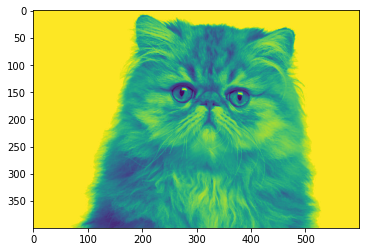

cats
[[0.00805295]]


In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
categories=["cats","dogs"] #Testing code
def prepare(filename):
    img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  #cv2.imwrite("docs/post_018_077_grayscale.png", img_array) 
    plt.imshow(img_array)
    plt.show()
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,1)/255.0
model_save=tf.keras.models.load_model('/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/modelVid3.h5')


img = '/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/cat02.jpg'
prepare_img = prepare(img).astype(np.float32)
prediction=model_save.predict([prepare_img])
predict = 1 if prediction[0][0] >= 0.5 else 0
print (categories[predict])
#print (categories[int(prediction[0])])
print(prediction)
#print(end-start)

In [ ]:
import os
y_predicted = []
y_true = []
y_true_labeled = []
def get_predictions():
      for features, label in training_data:
        #print(features)
        prediction=model_save.predict([np.array(features.reshape(-1,128,128,1)).astype(np.float32)/255.0])
        predict = 1 if prediction[0][0] >=0.5 else 0
        y_predicted.append(predict)
        y_true.append(label)
        y_true_labeled.append(categories[label])

get_predictions()
y_predicted = np.array(y_predicted).astype(np.int)
y_true = np.array(y_true,np.uint8)

# Confusion Matrix

Confusion matrix, without normalization
[[3894  106]
 [ 517 3488]]


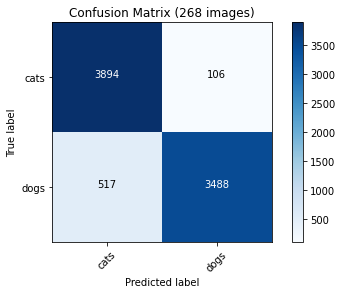

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/confusion_matrix.png",bbox_inches = 'tight')

cnf_matrix = confusion_matrix(y_true, y_predicted)
#print(cnf_matrix)
#print(categories)
plt.figure()
plot_confusion(cnf_matrix, classes=categories,normalize=False,title='Confusion Matrix (268 images)')
#ax_.set_title("Matriz de Confusión")

#print(title)
#print(confusion_matrix)

plt.show()

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
categories=["CAT","DOG"] #Testing code
def prepare(filename):
    
    img = cv2.cvtColor(filename, cv2.COLOR_BGR2GRAY )
    new_array=cv2.resize(img,(128,128))
    return new_array.reshape(-1,128,128,1)/255.0

model_save=tf.keras.models.load_model('/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/modelVid2.h5')


path = "/home/akashchaurasia/Utkarsh/DataSet/CatVSDog/PredVideo2.mp4"
cap = cv2.VideoCapture(path)

if (cap.isOpened()== False): 
      print("Error opening video stream or file")
        
while(cap.isOpened()):
     
    ret, frame = cap.read()
    
    prepare_img = prepare(frame).astype(np.float32)
    prediction=model_save.predict([prepare_img])
    predict = 1 if prediction[0][0] >= 0.5 else 0

    
    if ret == True:

        
        frame1 = cv2.putText(img= frame, text = categories[int(predict)], org = (200, 200), fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 2.0,color = (125, 246, 55),thickness = 2)
        cv2.imshow("test_window",frame1)
        
        
         
    # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    else:
        
        break

cap.release()
cv2.destroyAllWindows()